In [1]:
# Write the requirements
!echo "" > requirements.txt
!echo "qiskit[all]~=2.0" >> requirements.txt
!echo "qiskit-ibm-runtime~=0.37" >> requirements.txt
!echo "qiskit-aer~=0.17" >> requirements.txt
!cat requirements.txt

# Install the notebook requirements
!pip install -q -r requirements.txt

import qiskit
import qiskit_ibm_runtime
import qiskit_aer

# Log package versions
print(f"qiskit version: {qiskit.__version__}")
print(f"qiskit-ibm-runtime version: {qiskit_ibm_runtime.__version__}")
print(f"qiskit-aer version: {qiskit_aer.__version__}")


qiskit[all]~=2.0
qiskit-ibm-runtime~=0.37
qiskit-aer~=0.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 9.8 MB/s eta

Before run this part:

1. Go to <https://quantum.ibm.com/> and copy the token
2. Open the secret tab here on colab on the left.
3. Create a new secret
4. Enable the access of the notebook to the secret

Name: QISKIT_IBM_TOKEN

Value: \<paste-your-token\>

In [ ]:
try:
  from google.colab import userdata

  IN_COLAB = True

except:
  IN_COLAB = False


# if IN_COLAB:
#   token = userdata.get("QISKIT_IBM_TOKEN")
# else:
#   print("This notebook must be run on Colab")


from qiskit_ibm_runtime import QiskitRuntimeService


## Utility Functions

In [ ]:
from math import pi
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_bloch_vector


def probability_dict(qc):
    psi = Statevector(qc)
    proba =  DensityMatrix(psi).probabilities_dict()
    # add 0s if not present
    for i in range(2**len(qc.qubits)):
        # status is a str, with a number of digits equal to the number of qubits
        status = format(i, '0' + str(len(qc.qubits)) + 'b')
        if status not in proba:
            proba[status] = 0.
    return proba


def plot_probability(qc, title="", ax=None):
    legend = [title, ]

    counts = probability_dict(qc)

    plot_histogram(
      [counts, ],
      legend=legend,
      color=['crimson',],
      title=title
    )

    # Bigger labels
    hist = plot_histogram(counts, sort='hamming', ax=ax, target_string='1')

    return hist

def plot_bloch(qc, title="", ax=None):
    psi = Statevector(qc)
    if False: # len(qc.qubits) == 1:
        return plot_bloch_vector(psi, title=title, figsize=(6, 6), ax=ax)
    else:
        return plot_bloch_multivector(psi, title=title, figsize=(6, 6))

## The Algorithm


### Example 1: work on a single Qubit

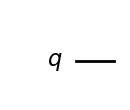

In [ ]:
qc = QuantumCircuit(1)
qc.draw('mpl')

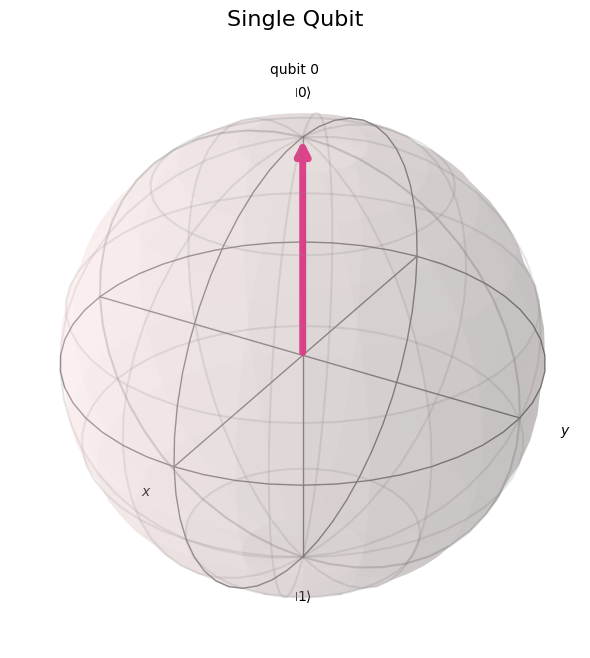

In [ ]:

qc_bloch = plot_bloch(qc, title="Single Qubit")
qc_proba = plot_histogram(probability_dict(qc), title="Single Qubit")
# plot both in two columns
import matplotlib.pyplot as plt
qc_bloch

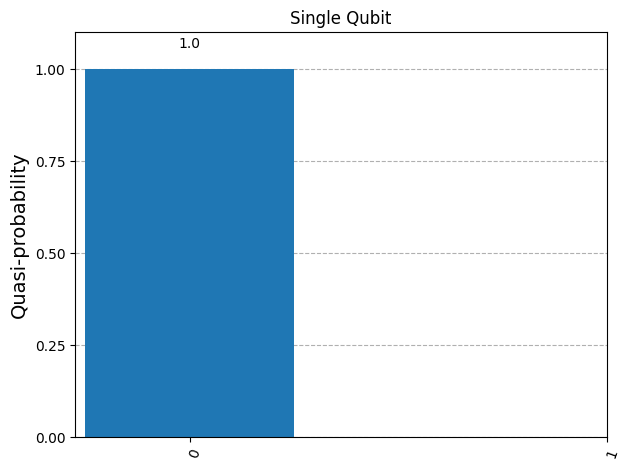

In [ ]:
qc_proba

In [ ]:
psi = Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

## Exercise 1.1

using the gate X (`qc.x(0)`) get the state

$$
|1⟩
$$

1. Create a single qubit circuit
2. apply the operator X to the first qubit
3. Display the Block sphere, and the Histogram

Play around applying twice the same operator to the qubit and see what happens


## Exercise 1.2

Using the Hadamard gate (qc.h(0)), create a superposition state:

$$
\frac{|0⟩ + |1⟩}{\sqrt{2}}
$$

Steps:
	1.	Create a single-qubit quantum circuit
	2.	Apply the Hadamard gate to qubit 0
	3.	Display the Bloch sphere to observe the qubit's state
	4.	Simulate the circuit with measurement and display the histogram of results

Try applying the Hadamard gate twice in a row and observe the effect. What state do you recover? Why does this happen?

Exercise 1.3

Use the rotation operator Rx(θ) to manipulate the qubit’s state around the X-axis of the Bloch sphere.

Goal 1

Apply a π rotation and obtain the state:

|1⟩

Goal 2

Apply a π⁄2 rotation and obtain a superposition state similar to:

\frac{|0⟩ + i|1⟩}{\sqrt{2}}

⸻

Steps:

1.	Create a single-qubit quantum circuit
2.	Apply the gate: qc.rx(angle, 0)
  - Use angle = π to flip the state from |0⟩ to |1⟩
  - Use angle = π/2 to create a superposition state
3.	Visualize the Bloch sphere to see the rotation effect
4.	Simulate the circuit with measurements and plot the histogram
5.	Compare the results with Exercise 1.1 and 1.2

Play with different angles like $\pi$, $\pi$/2, and 2$\pi$. Observe how the state evolves on the Bloch sphere and how it affects the measurement results.


## Exercise 1.4

Use a combination of Ry and Rz rotations to explore how phase affects the qubit state.

Goal:

Understand how a Z-rotation introduces a relative phase, without affecting measurement probabilities in the computational basis.

Instructions:

1.	Create a quantum circuit with 1 qubit and 1 classical bit.
2.	Apply a rotation around the Y-axis using:

      `qc.ry((pi + 0.85) / 3, 0)`
    
3.	Measure the qubit and record the histogram.
4.	Now add a Z-rotation (after ry) with:

      `qc.rz(pi / 4, 0)`

## Exercise 1.5

Apply the S gate to explore its effect on the qubit’s phase and representation on the Bloch sphere.

Goal:

Understand how a phase gate like S changes the quantum state's phase, but not its measurement probabilities in the computational basis.

Instructions:

	1.	Create a single-qubit quantum circuit.
	2.	Apply a Hadamard gate to bring the qubit into a superposition:

  `qc.h(0)`

	3.	Apply the S gate:

  `qc.s(0)`

	4.	Add a measurement and visualize the histogram.
	5.	Compare it with the same circuit without the S gate.

The [S gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.SGate) applies a phase of i to the $|1⟩$ state. It is equivalent to RZ for the angle $\pi/2$.